<a href="https://colab.research.google.com/github/franklin-univ-data-science/comp411/blob/master/Module08_Report_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Report


Explore an on-line published machine learning projects, based on what you have learned in this course, compose a research report at least including:

1. What is the problem? 
2. What is the type of machine learning?
3. What are the feature variables and target variables?
4. What data preprocessing was used?
5. How did the author explore the data?
6. What machine learning algorithms were used?
6. How the model's performance was evaluated?
7. What is the conclusion? Is it reasonable?
8. If you were the author, which part would you want to improve?


Pick the following Kaggle project: 

- [Titanic Survival](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling)

**Due date:** Nov. 2



# Project

**Predict the default of a credit card**

The training data set includes a binary variable, default payment (Yes = 1, No = 0), as the target variable, and the following 23 variables as the features variables:

- X1: Amount of the given credit 
- X2: Gender (1 = male; 2 = female) 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others) 
- X4: Marital status (1 = married; 2 = single; 3 = others) 
- X5: Age 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement. X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment. X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

Hint: Check the target variable; is the classes balanced or imbalanced?


data file: https://raw.githubusercontent.com/franklin-univ-data-science/data/master/credit_default.csv 
 

## Actions

Implement a model in Jupyter Notebook and discuss the following topics:
 - Describe the problem
   - What is the problem? 
   - What is the type of machine learning?
   - What are the feature variables and target variables?
 - Data exploration and preprocessing
   - How did you explore the data?
   - How did you clean the data (are there missing or invalid values)?
 - Modeling
   - Split 20% data as the test set using the random status 123.
   - What machine learning algorithms were used? Which is better?
   - What evaluation metric do you prefer?
   - How did you evaluate model's performance? 
   - How did you diagnose the model? Is it overfitting, under fitting, or good fitting?
 - Results and discussion
   - What is your model's results? Is it good? Do you have any concerns?
   
**Due Date:** the last week.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/credit_default.csv', header=0)

#Labeling data for readability
df.rename(columns ={'X1' : 'Credit',
                   'X2' : 'SEX',
                   'X3' : 'Education',
                   'X4' : 'Marital_Stat',
                   'X5' : 'Age',
                   'X6' : 'R_Stat Sep-05',
                   'X7' : 'R_Stat Aug-05',
                   'X8' : 'R_Stat Jul-05',
                   'X9' : 'R_Stat Jun-05',
                   'X10' : 'R_Stat May-05',
                   'X11' : 'R_Stat Apr-05',
                   'X12' : 'STMT_BAL Sep-05',
                   'X13' : 'STMT_BAL Aug-05',
                   'X14' : 'STMT_BAL Jul-05',
                   'X15' : 'STMT_BAL Jun-05',
                   'X16' : 'STMT_BAL May-05',
                   'X17' : 'STMT_BAL Apr-05',
                   'X18' : 'Prev_Pmt Sep-05',
                   'X19' : 'Prev_Pmt Aug-05',
                   'X20' : 'Prev_Pmt Jul-05',
                   'X21' : 'Prev_Pmt Jun-05',
                   'X22' : 'Prev_Pmt May-05',
                   'X23' : 'Prev_Pmt Apr-05',
                   'Y' : 'Default'},
         inplace = True)

df.head()

,ID,Credit,SEX,Education,Marital_Stat,Age,R_Stat Sep-05,R_Stat Aug-05,R_Stat Jul-05,R_Stat Jun-05,...,STMT_BAL Jun-05,STMT_BAL May-05,STMT_BAL Apr-05,Prev_Pmt Sep-05,Prev_Pmt Aug-05,Prev_Pmt Jul-05,Prev_Pmt Jun-05,Prev_Pmt May-05,Prev_Pmt Apr-05,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info() #look at datatypes and null check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   Credit           30000 non-null  int64
 2   SEX              30000 non-null  int64
 3   Education        30000 non-null  int64
 4   Marital_Stat     30000 non-null  int64
 5   Age              30000 non-null  int64
 6   R_Stat Sep-05    30000 non-null  int64
 7   R_Stat Aug-05    30000 non-null  int64
 8   R_Stat Jul-05    30000 non-null  int64
 9   R_Stat Jun-05    30000 non-null  int64
 10  R_Stat May-05    30000 non-null  int64
 11  R_Stat Apr-05    30000 non-null  int64
 12  STMT_BAL Sep-05  30000 non-null  int64
 13  STMT_BAL Aug-05  30000 non-null  int64
 14  STMT_BAL Jul-05  30000 non-null  int64
 15  STMT_BAL Jun-05  30000 non-null  int64
 16  STMT_BAL May-05  30000 non-null  int64
 17  STMT_BAL Apr-05  30000 non-null  int64
 18  Prev_P

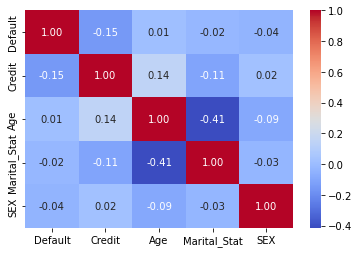

In [6]:
#heatmap to see if a specific Age, Credit level, marital status, or gender has a coralation to default payment status
g = sns.heatmap(df[['Default', 'Credit', 'Age' , 'Marital_Stat', 'SEX']].corr(),annot=True, fmt =".2f", 
                cmap = "coolwarm") 

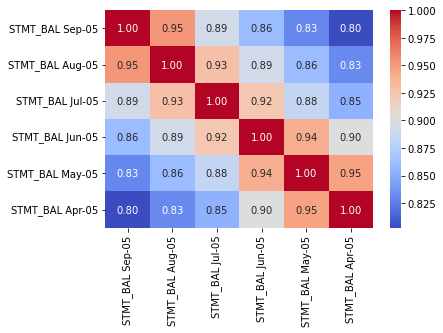

In [7]:
#Statement balance coralation month to month
g = sns.heatmap(df[['STMT_BAL Sep-05', 'STMT_BAL Aug-05', 'STMT_BAL Jul-05', 'STMT_BAL Jun-05', 
                    'STMT_BAL May-05', 'STMT_BAL Apr-05']].corr(),annot=True, fmt =".2f", cmap = "coolwarm") 

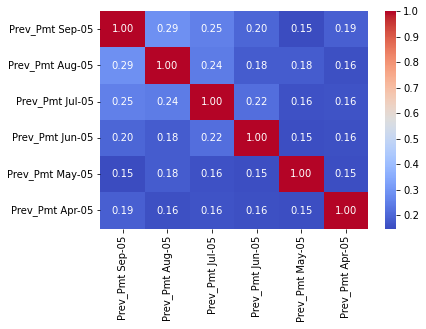

In [8]:
#Previous Payment Amount Coralation Month to Month
g = sns.heatmap(df[['Prev_Pmt Sep-05', 'Prev_Pmt Aug-05', 'Prev_Pmt Jul-05', 'Prev_Pmt Jun-05', 'Prev_Pmt May-05',
                   'Prev_Pmt Apr-05']].corr(),annot=True, fmt =".2f", cmap = "coolwarm") 

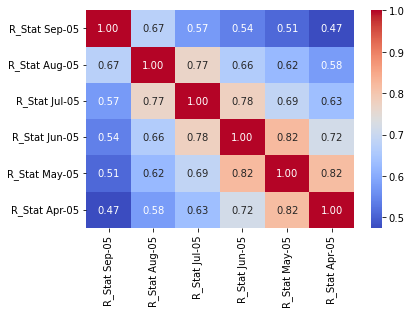

In [9]:
g = sns.heatmap(df[['R_Stat Sep-05', 'R_Stat Aug-05', 'R_Stat Jul-05', 'R_Stat Jun-05',
                    'R_Stat May-05', 'R_Stat Apr-05']].corr(),annot=True, fmt =".2f", cmap = "coolwarm")

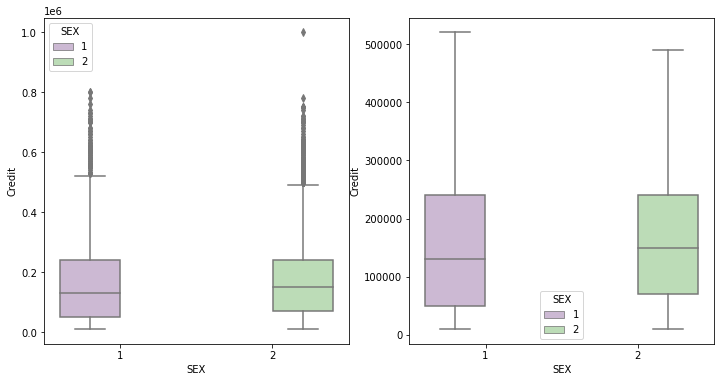

In [10]:
#Credit limits between sexes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="Credit", hue="SEX",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="Credit", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show();

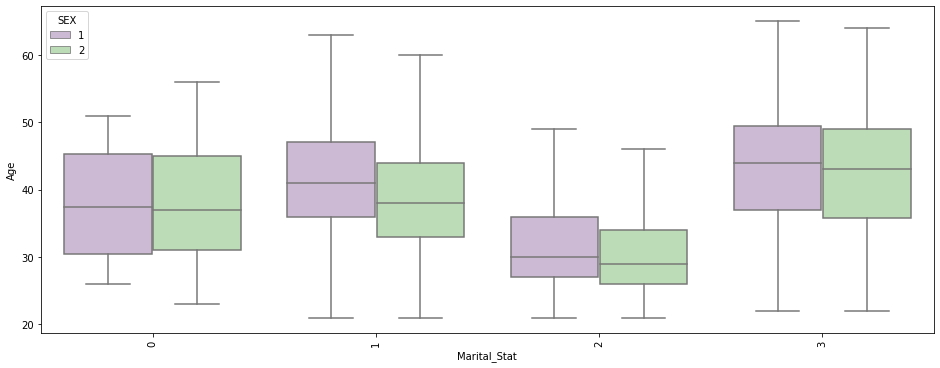

In [11]:
#Combining Age, Sex, and Marraige Status
#Sex 1 i= Male 2 = Female
#Marital Status 1 = married; 2 = single; 3 = others
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

boxplot_variation('Marital_Stat','Age', 'SEX')

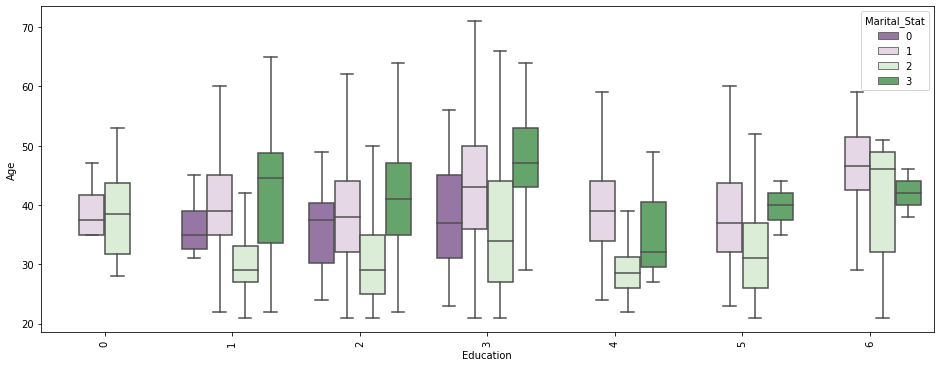

In [12]:
#Education 1 = graduate school; 2 = university; 3 = high school; 4 = others 5&6=?
boxplot_variation('Education','Age', 'Marital_Stat')

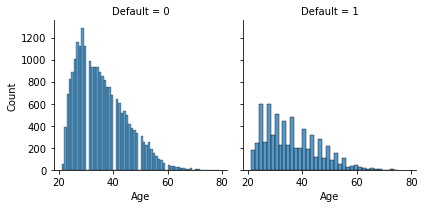

In [13]:
g = sns.FacetGrid(df, col='Default')
g = g.map(sns.histplot, "Age") #Age of those not and in default

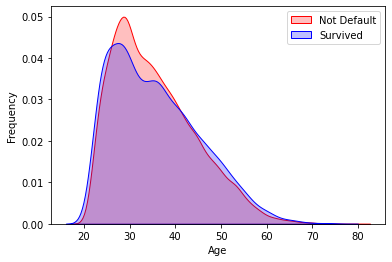

In [14]:
# Explore Age distibution
g = sns.kdeplot(df["Age"][(df["Default"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["Default"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Default","Survived"])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.iloc[:, :23].values, df.iloc[:, 24].values

# Split data into 80% train 20% test with a Random State of 123
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,  
                     test_size=0.20,
                     stratify=y,
                     random_state=123)

# Standardizing Data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# Gradient Boosting Classifier
clf = GradientBoostingClassifier(learning_rate=0.07, max_depth=3,
                                 max_features=9, min_samples_leaf=20,
                                 n_estimators=70, random_state=123).fit(X_train_std, y_train)

# Determining Misclassified Samples and Model Accuracy
y_pred = clf.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# AUC metric to test model
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

Misclassified samples: 1050
Accuracy: 0.825


0.6583291821686931

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
tree = DecisionTreeClassifier(min_samples_split=0.2, max_features=7, random_state=123).fit(X_train_std, y_train)

# Determining Misclassified Samples and Model Accuracy
y_pred = tree.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# AUC metric to test model
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

Misclassified samples: 1068
Accuracy: 0.822


0.6439927876974799

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
forest = RandomForestClassifier(n_estimators=136, max_depth=15, min_samples_split=0.01, 
                                max_features=15, max_leaf_nodes=49, random_state=123, n_jobs=4).fit(X_train_std, y_train)

# Determining Misclassified Samples and Model Accuracy
y_pred = forest.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# AUC metric to test model
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

Misclassified samples: 1051
Accuracy: 0.825


0.6566034318910394